## Setup

Importando bibliotecas

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Carregando dados e armazenando no dataframe df:

In [2]:
df_hour = pd.read_csv('hour.csv', parse_dates=['dteday'])
df_day  = pd.read_csv('day.csv', parse_dates=['dteday'])

In [3]:
df_hour.head()

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [4]:
df_day.head()

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

Entendendo quais são os tipos das variáveis que estamos lidando

In [5]:
df_hour.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [6]:
df_day.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

#### Verificando consistência nos dados:

* Soma incorreta:

In [7]:
(df_hour['cnt'] != df_hour['casual'] + df_hour['registered']).value_counts()

False    17379
dtype: int64

* Contagem zerada:

In [8]:
(df_hour['cnt'] == 0).value_counts()

False    17379
Name: cnt, dtype: int64

Parece ok! Todos os registros indicam uso de bicicleta.

# Analisando o DataFrame
A correlação de Pearson mede a dependência linear entre dois variáveis X e Y. O coeficiente resultante é um valor entre -1 e 1, onde:
-  **1**: correlação total positiva
-  **0**: não há correlação linear, as variávies são independentes
- **-1**: correlação total negativa

#### Verificamos o coeficiente da correlação de Pearson entre os atributos que fazem sentido:

In [9]:
columns = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
corr_hour = df_hour[columns].corr()
corr_hour

season      mnth        hr   holiday   weekday  workingday  \
season      1.000000  0.830386 -0.006117 -0.009585 -0.002335    0.013743   
mnth        0.830386  1.000000 -0.005772  0.018430  0.010400   -0.003477   
hr         -0.006117 -0.005772  1.000000  0.000479 -0.003498    0.002285   
holiday    -0.009585  0.018430  0.000479  1.000000 -0.102088   -0.252471   
weekday    -0.002335  0.010400 -0.003498 -0.102088  1.000000    0.035955   
workingday  0.013743 -0.003477  0.002285 -0.252471  0.035955    1.000000   
weathersit -0.014524  0.005400 -0.020203 -0.017036  0.003311    0.044672   
temp        0.312025  0.201691  0.137603 -0.027340 -0.001795    0.055390   
atemp       0.319380  0.208096  0.133750 -0.030973 -0.008821    0.054667   
hum         0.150625  0.164411 -0.276498 -0.010588 -0.037158    0.015688   
windspeed  -0.149773 -0.135386  0.137252  0.003988  0.011502   -0.011830   
casual      0.120206  0.068457  0.301202  0.031564  0.032721   -0.300942   
registered  0.174226  0.122273  0.374141 -0.047345  0.021578    0.134326   
cnt         0.178056  0.120638  0.394071 -0.030927  0.026900    0.030284   

            weathersit      temp     atemp       hum  windspeed    casual  \
season       -0.014524  0.312025  0.319380  0.150625  -0.149773  0.120206   
mnth          0.005400  0.201691  0.208096  0.164411  -0.135386  0.068457   
hr           -0.020203  0.137603  0.133750 -0.276498   0.137252  0.301202   
holiday      -0.017036 -0.027340 -0.030973 -0.010588   0.003988  0.031564   
weekday       0.003311 -0.001795 -0.008821 -0.037158   0.011502  0.032721   
workingday    0.044672  0.055390  0.054667  0.015688  -0.011830 -0.300942   
weathersit    1.000000 -0.102640 -0.105563  0.418130   0.026226 -0.152628   
temp         -0.102640  1.000000  0.987672 -0.069881  -0.023125  0.459616   
atemp        -0.105563  0.987672  1.000000 -0.051918  -0.062336  0.454080   
hum           0.418130 -0.069881 -0.051918  1.000000  -0.290105 -0.347028   
windspeed     0.026226 -0.023125 -0.062336 -0.290105   1.000000  0.090287   
casual       -0.152628  0.459616  0.454080 -0.347028   0.090287  1.000000   
registered   -0.120966  0.335361  0.332559 -0.273933   0.082321  0.506618   
cnt          -0.142426  0.404772  0.400929 -0.322911   0.093234  0.694564   

            registered       cnt  
season        0.174226  0.178056  
mnth          0.122273  0.120638  
hr            0.374141  0.394071  
holiday      -0.047345 -0.030927  
weekday       0.021578  0.026900  
workingday    0.134326  0.030284  
weathersit   -0.120966 -0.142426  
temp          0.335361  0.404772  
atemp         0.332559  0.400929  
hum          -0.273933 -0.322911  
windspeed     0.082321  0.093234  
casual        0.506618  0.694564  
registered    1.000000  0.972151  
cnt           0.972151  1.000000

In [10]:
columns = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
corr_day = df_day[columns].corr()
corr_day

season      mnth   holiday   weekday  workingday  weathersit  \
season      1.000000  0.831440 -0.010537 -0.003080    0.012485    0.019211   
mnth        0.831440  1.000000  0.019191  0.009509   -0.005901    0.043528   
holiday    -0.010537  0.019191  1.000000 -0.101960   -0.253023   -0.034627   
weekday    -0.003080  0.009509 -0.101960  1.000000    0.035790    0.031087   
workingday  0.012485 -0.005901 -0.253023  0.035790    1.000000    0.061200   
weathersit  0.019211  0.043528 -0.034627  0.031087    0.061200    1.000000   
temp        0.334315  0.220205 -0.028556 -0.000170    0.052660   -0.120602   
atemp       0.342876  0.227459 -0.032507 -0.007537    0.052182   -0.121583   
hum         0.205445  0.222204 -0.015937 -0.052232    0.024327    0.591045   
windspeed  -0.229046 -0.207502  0.006292  0.014282   -0.018796    0.039511   
casual      0.210399  0.123006  0.054274  0.059923   -0.518044   -0.247353   
registered  0.411623  0.293488 -0.108745  0.057367    0.303907   -0.260388   
cnt         0.406100  0.279977 -0.068348  0.067443    0.061156   -0.297391   

                temp     atemp       hum  windspeed    casual  registered  \
season      0.334315  0.342876  0.205445  -0.229046  0.210399    0.411623   
mnth        0.220205  0.227459  0.222204  -0.207502  0.123006    0.293488   
holiday    -0.028556 -0.032507 -0.015937   0.006292  0.054274   -0.108745   
weekday    -0.000170 -0.007537 -0.052232   0.014282  0.059923    0.057367   
workingday  0.052660  0.052182  0.024327  -0.018796 -0.518044    0.303907   
weathersit -0.120602 -0.121583  0.591045   0.039511 -0.247353   -0.260388   
temp        1.000000  0.991702  0.126963  -0.157944  0.543285    0.540012   
atemp       0.991702  1.000000  0.139988  -0.183643  0.543864    0.544192   
hum         0.126963  0.139988  1.000000  -0.248489 -0.077008   -0.091089   
windspeed  -0.157944 -0.183643 -0.248489   1.000000 -0.167613   -0.217449   
casual      0.543285  0.543864 -0.077008  -0.167613  1.000000    0.395282   
registered  0.540012  0.544192 -0.091089  -0.217449  0.395282    1.000000   
cnt         0.627494  0.631066 -0.100659  -0.234545  0.672804    0.945517   

                 cnt  
season      0.406100  
mnth        0.279977  
holiday    -0.068348  
weekday     0.067443  
workingday  0.061156  
weathersit -0.297391  
temp        0.627494  
atemp       0.631066  
hum        -0.100659  
windspeed  -0.234545  
casual      0.672804  
registered  0.945517  
cnt         1.000000

#### Comparando os Datasets através de um mapa de calor:

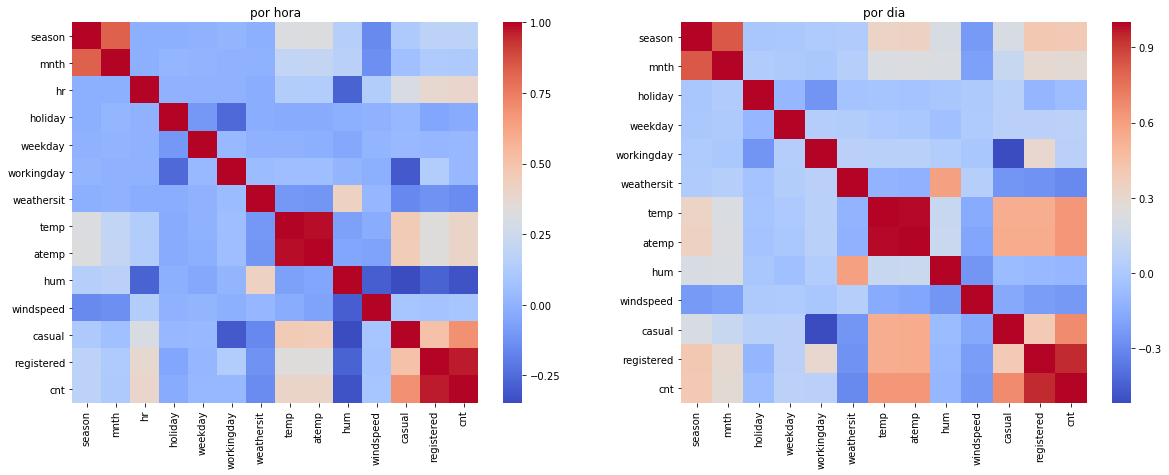

In [11]:
plt.figure(figsize=(20, 7))

plt.figure
plt.subplot(1, 2, 1)
plt.title('por hora')
sns.heatmap(corr_hour, cmap='coolwarm')

plt.subplot(1, 2, 2)
plt.title('por dia')
sns.heatmap(corr_day, cmap='coolwarm')
plt.show()

# Qual é o perfil dos usuários?

## Perfil dos usuários de acordo com os dias da semana
#### Dias da Semana:
- **0**: Domingo
- **1**: Segunda
- **2**: Terça
- **3**: Quarta
- **4**: Quinta
- **5**: Sexta
- **6**: Sábado

#### Média de locações dos usuários casuais e registrados durante a semana:

In [35]:
df_day['weekday_name'] = df_day['dteday'].dt.strftime("%A")
semana = df_day[['weekday_name', 'casual', 'registered']]
semana.groupby(['weekday_name'], as_index=False).mean()

weekday_name       casual   registered
0       Friday   752.288462  3938.000000
1       Monday   674.133333  3663.990476
2     Saturday  1465.257143  3085.285714
3       Sunday  1338.295238  2890.533333
4     Thursday   590.961538  4076.298077
5      Tuesday   556.182692  3954.480769
6    Wednesday   551.144231  3997.394231

#### Comparando número de locações durante a semana entre os perfis:

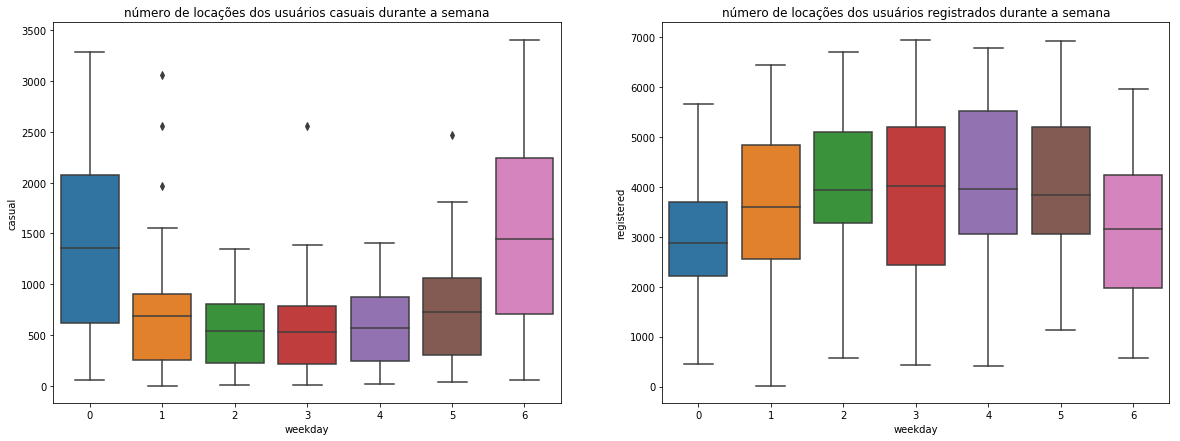

In [13]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
plt.title('número de locações dos usuários casuais durante a semana')
sns.boxplot(x='weekday', y='casual', data=semana)

plt.subplot(1, 2, 2)
plt.title('número de locações dos usuários registrados durante a semana')
sns.boxplot(x='weekday', y='registered', data=semana)

plt.show()

* Casuais claramente prefere o fim de semana, sugerindo uso para lazer, enquanto os usuários registrados utilizam mais durante os dias úteis, sugerindo que usam o serviço para ir trabalhar.

## Perfil dos usuários de acordo com o horário
#### Média de locações dos usuários casuais e registrados por horário:

In [36]:
horario = df_hour[['hr', 'casual', 'registered']]
horario.groupby(['hr'], as_index=False).mean()

hr     casual  registered
0    0  10.158402   43.739669
1    1   6.504144   26.871547
2    2   4.772028   18.097902
3    3   2.715925    9.011478
4    4   1.253945    5.098996
5    5   1.411437   18.478382
6    6   4.161379   71.882759
7    7  11.055021  201.009629
8    8  21.679505  337.331499
9    9  30.891334  188.418157
10  10  46.477304  127.191197
11  11  59.540578  148.602476
12  12  68.293956  185.021978
13  13  72.308642  181.352538
14  14  75.567901  165.381344
15  15  74.905350  176.327846
16  16  73.745205  238.238356
17  17  74.273973  387.178082
18  18  61.120879  364.390110
19  19  48.770604  262.752747
20  20  36.233516  189.796703
21  21  28.255495  144.059066
22  22  22.252747  109.082418
23  23  15.199176   72.631868

#### Comparando o número de locações por horário entre os perfis:

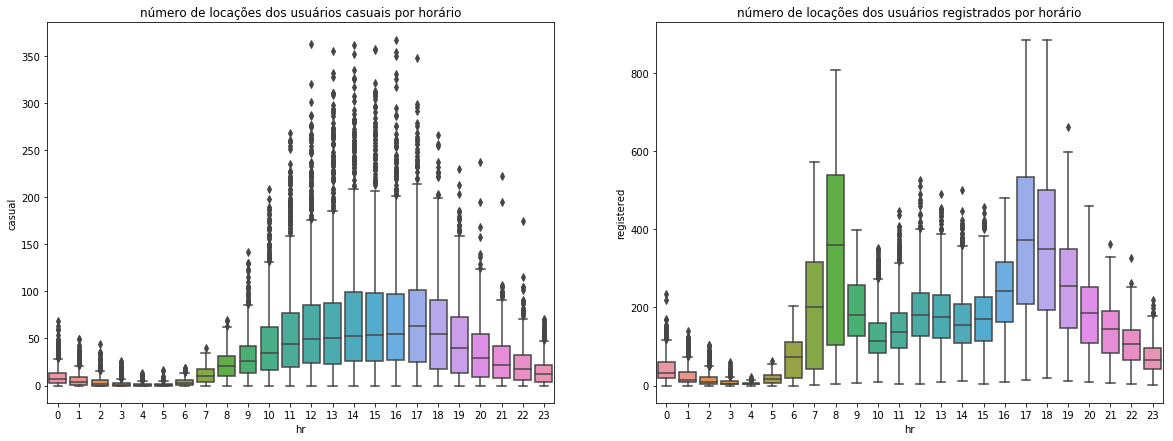

In [15]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
plt.title('número de locações dos usuários casuais por horário')
sns.boxplot(x='hr', y='casual', data=horario)

plt.subplot(1, 2, 2)
plt.title('número de locações dos usuários registrados por horário')
sns.boxplot(x='hr', y='registered', data=horario)

plt.show()

* Usuários registrados usam mais nos horários de pico; casuais preferem usar à tarde. Isso sugeriria que os registrados usam o serviço para ir trabalhar.

## Perfil dos usuários durante o ano
#### Média de locações dos usuários casuais e registrados por mês:

In [16]:
mes = df_day[['mnth', 'casual', 'registered']]
mes.groupby(['mnth'], as_index=False).mean()

mnth       casual   registered
0      1   194.225806  1982.112903
1      2   262.508772  2392.789474
2      3   716.838710  2975.419355
3      4  1013.366667  3471.533333
4      5  1214.274194  4135.500000
5      6  1231.766667  4540.600000
6      7  1260.596774  4303.080645
7      8  1161.919355  4502.500000
8      9  1172.050000  4594.466667
9     10   963.870968  4235.354839
10    11   610.050000  3637.133333
11    12   349.887097  3053.919355

#### Comparando o número de locações durante o ano entre os perfis:

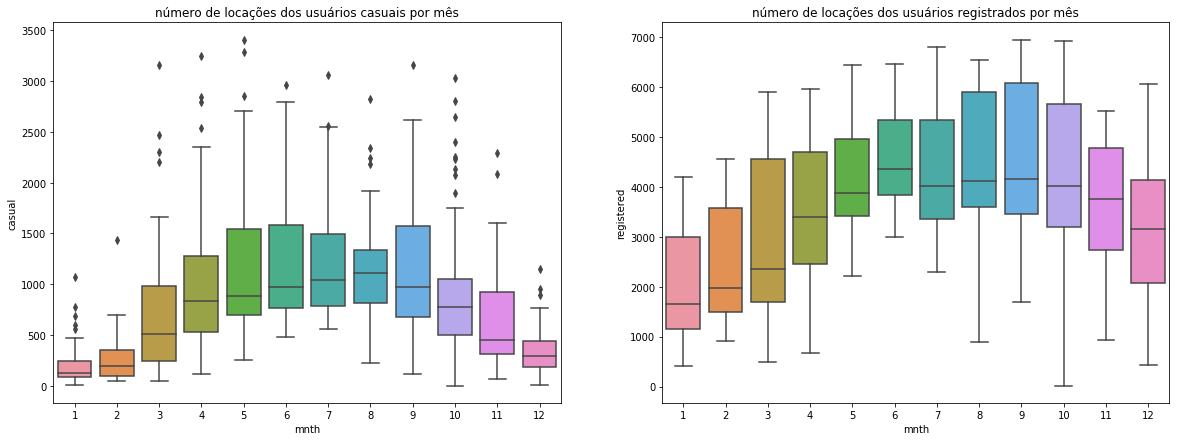

In [17]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
plt.title('número de locações dos usuários casuais por mês')
sns.boxplot(x='mnth', y='casual', data=mes)

plt.subplot(1, 2, 2)
plt.title('número de locações dos usuários registrados por mês')
sns.boxplot(x='mnth', y='registered', data=mes)

plt.show()

* Usuários casuais rejeitam o serviço nos meses mais frios

## Perfil dos usuários durante as estações
#### Estações:
- **1**: Primavera
- **2**: Verão
- **3**: Outono
- **4**: Inverno

#### Média das locações dos usuários casuais e registrados durante as estações:

In [18]:
estacoes = df_day[['season', 'casual', 'registered']]
estacoes.groupby(['season'], as_index=False).mean()

season       casual   registered
0       1   334.928177  2269.204420
1       2  1106.097826  3886.233696
2       3  1202.611702  4441.691489
3       4   729.112360  3999.050562

#### Comparando o número de locações durante as estações entre os perfis:

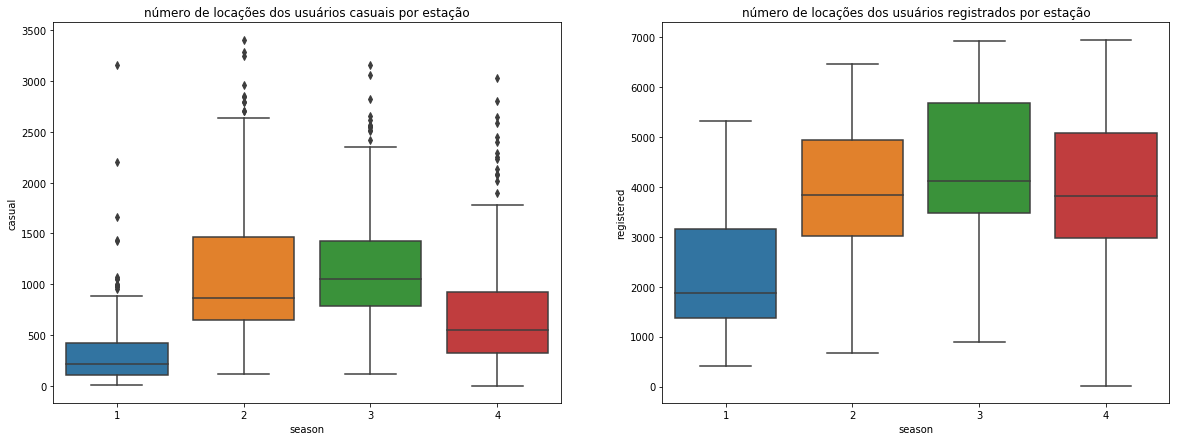

In [19]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
plt.title('número de locações dos usuários casuais por estação')
sns.boxplot(x='season', y='casual', data=estacoes)

plt.subplot(1, 2, 2)
plt.title('número de locações dos usuários registrados por estação')
sns.boxplot(x='season', y='registered', data=estacoes)

plt.show()

### * Algo estranho: menor uso na primavera do que no inverno! Será que a descrição do dataset está correta?

# Como o clima afeta o número de locações?

### Número de locações de acordo com a situação climática
#### Situação climática:
- **1**: céu limpo, poucas nuvens, parcialmente nublado
- **2**: nublado + névoa, nuvens quebradas + névoa, poucas nuvens + névoa, névoa
- **3**: pouca neve, chuva leve + trovoadas + nuvens dispersas
- **4**: chuva pesada + granizo + trovoadas + névoa, neve + nevoeiro

#### Média das locações dos usuários casuais e registrados para cada situação climática:

In [20]:
clima_loc = df_day[['weathersit', 'casual', 'registered', 'cnt']]
clima_loc.groupby(['weathersit'], as_index=False).mean()

weathersit      casual   registered          cnt
0           1  964.030238  3912.755940  4876.786177
1           2  687.352227  3348.510121  4035.862348
2           3  185.476190  1617.809524  1803.285714

#### Comparando o número de locações de acordo com a situação climática entre os perfis:

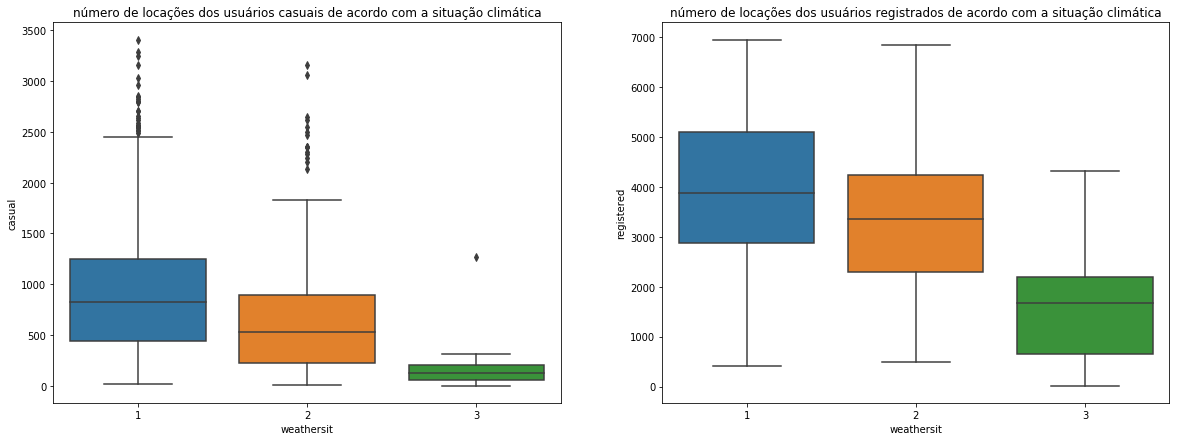

In [37]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
plt.title('número de locações dos usuários casuais de acordo com a situação climática')
sns.boxplot(x='weathersit', y='casual', data=clima_loc)

plt.subplot(1, 2, 2)
plt.title('número de locações dos usuários registrados de acordo com a situação climática')
sns.boxplot(x='weathersit', y='registered', data=clima_loc)

plt.show()

A locação dos usuários casuais são mais afetados com a mudança climática em comparação com os usuários registrados. Há pouca demanda nos dias chuvosos independentemente do perfil.

### Sensação térmica

Investigando a depressão:

/home/akumaex/Documentos/MAC0459/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


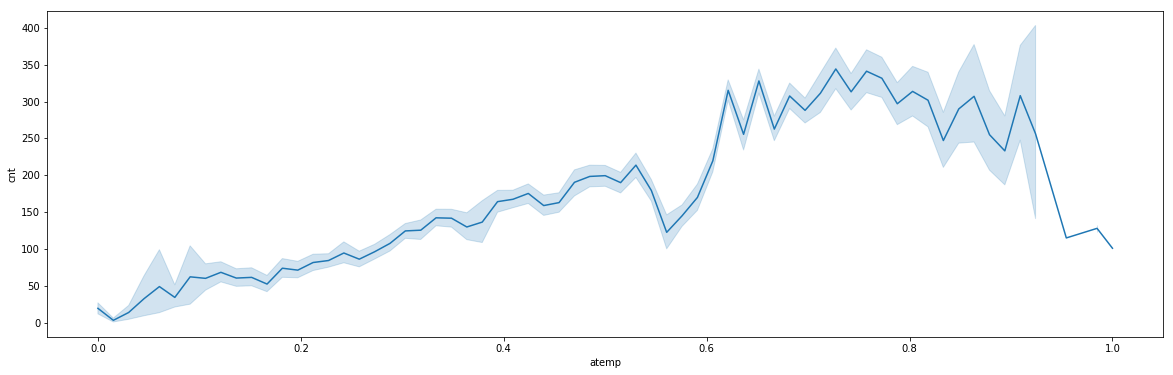

In [39]:
plt.figure(figsize=(20, 6))
sns.lineplot(df_hour['atemp'], df_hour['cnt'])
plt.show()

Ela ocorre a aproximadamente 0.55, no meio entre a mínima e a máxima (esta, segundo a descrição, é 41 graus):

/home/akumaex/Documentos/MAC0459/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


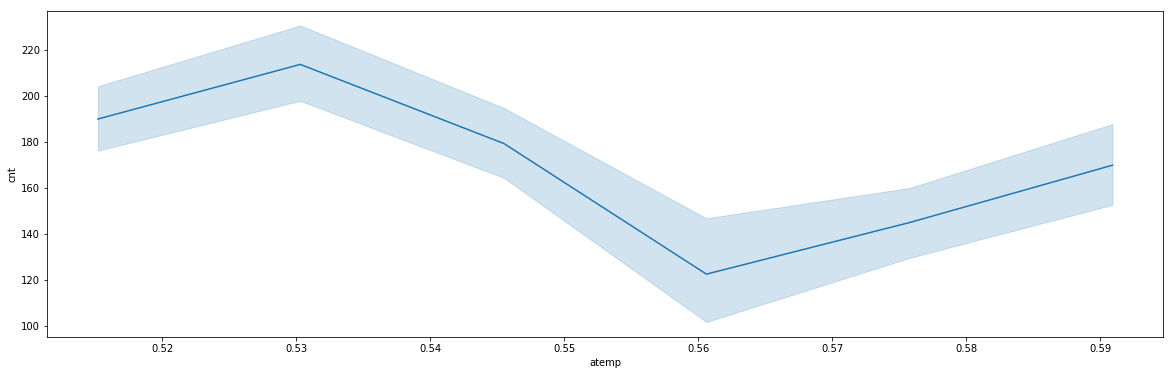

In [23]:
depressao = df_hour[(df_hour['atemp'] > 0.5) & ((df_hour['atemp'] < 0.6))]
plt.figure(figsize=(20, 6))
sns.lineplot(depressao['atemp'], depressao['cnt'])
plt.show()

Qual será o fator influenciador?

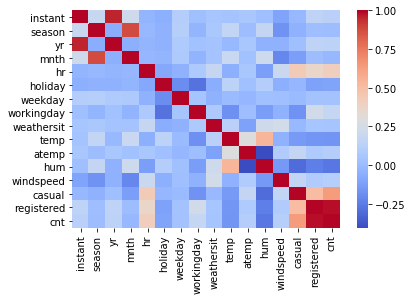

In [24]:
depressao = df_hour[(df_hour['atemp'] > 0.55) & ((df_hour['atemp'] < 0.6))]
sns.heatmap(depressao.corr(), cmap='coolwarm')

Vemos a mais baixa correlação do uso (`cnt`) com a umidade (`hum`):

In [25]:
depressao['hum'].describe()

count    952.000000
mean       0.817868
std        0.083308
min        0.150000
25%        0.780000
50%        0.830000
75%        0.890000
max        0.940000
Name: hum, dtype: float64

/home/akumaex/Documentos/MAC0459/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


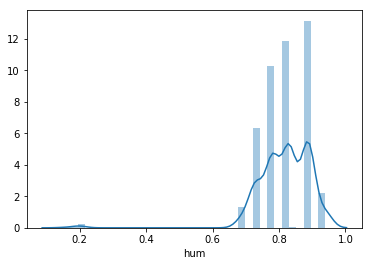

In [26]:
sns.distplot(depressao['hum'])

Parece que estava ameaçando chover... :)

In [27]:
depressao['weathersit'].value_counts()

1    515
2    305
3    132
Name: weathersit, dtype: int64

A maior parte do tempo é "bom" (1) :(

E a temperatura?

In [28]:
depressao['temp'].describe()

count    952.000000
mean       0.625042
std        0.019494
min        0.600000
25%        0.600000
50%        0.620000
75%        0.640000
max        0.660000
Name: temp, dtype: float64

Está amena...

Outra hipótse: em fevereiro e março, geralmente, é o período onde há mais neve nas ruas, parada ou derretendo, independente da situação climática.

/home/akumaex/Documentos/MAC0459/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


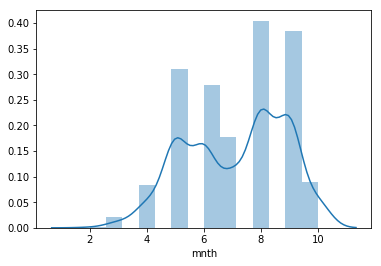

In [29]:
sns.distplot(depressao['mnth'])

Correlações:

season


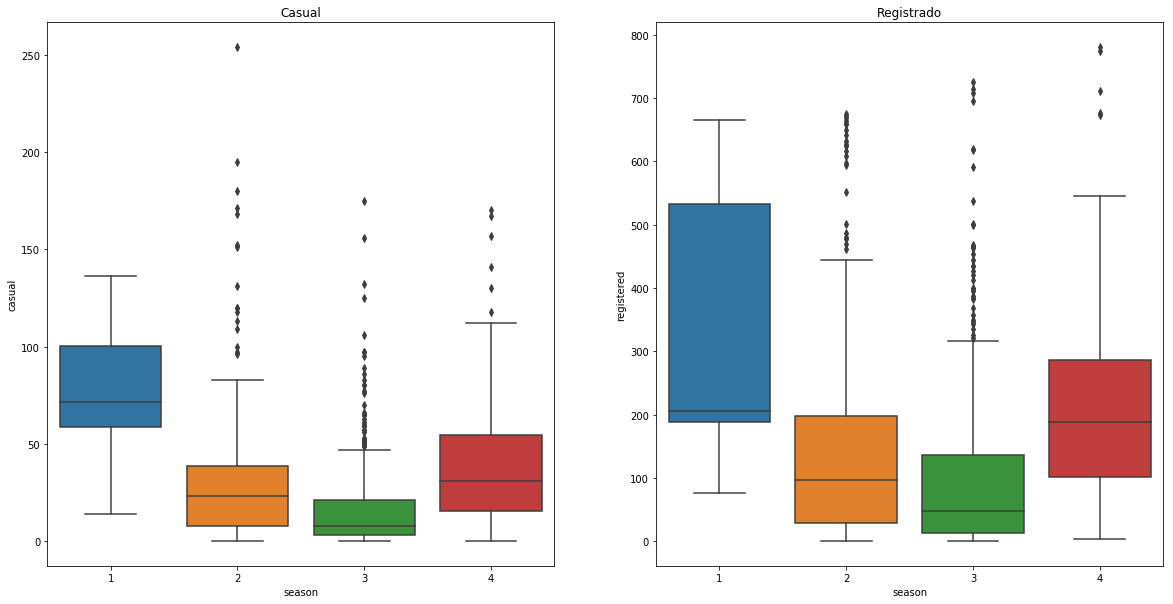

yr


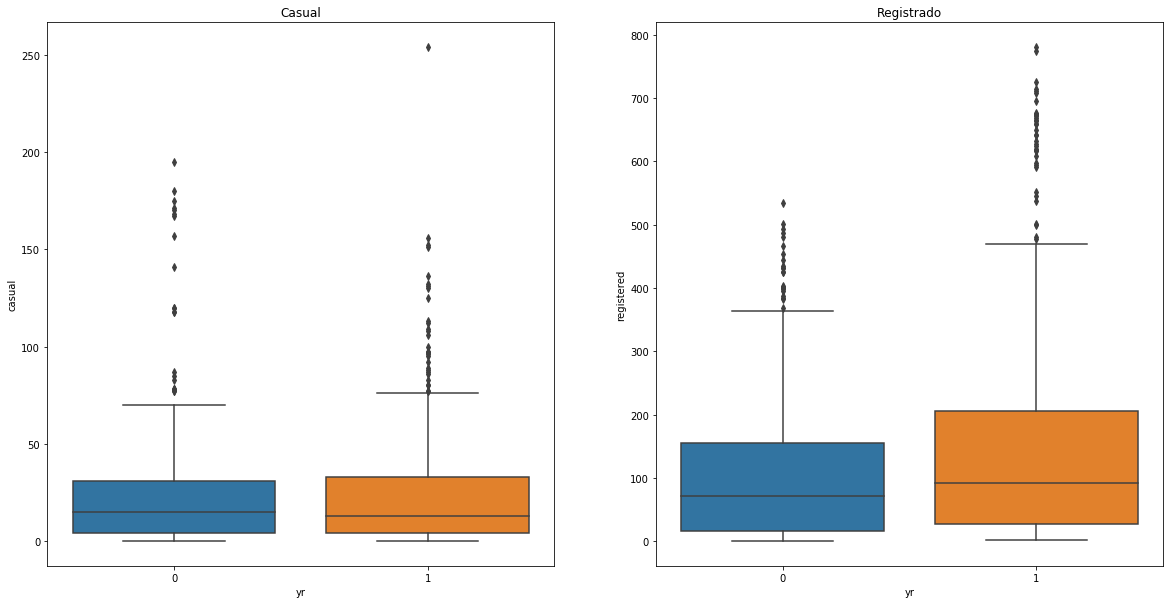

mnth


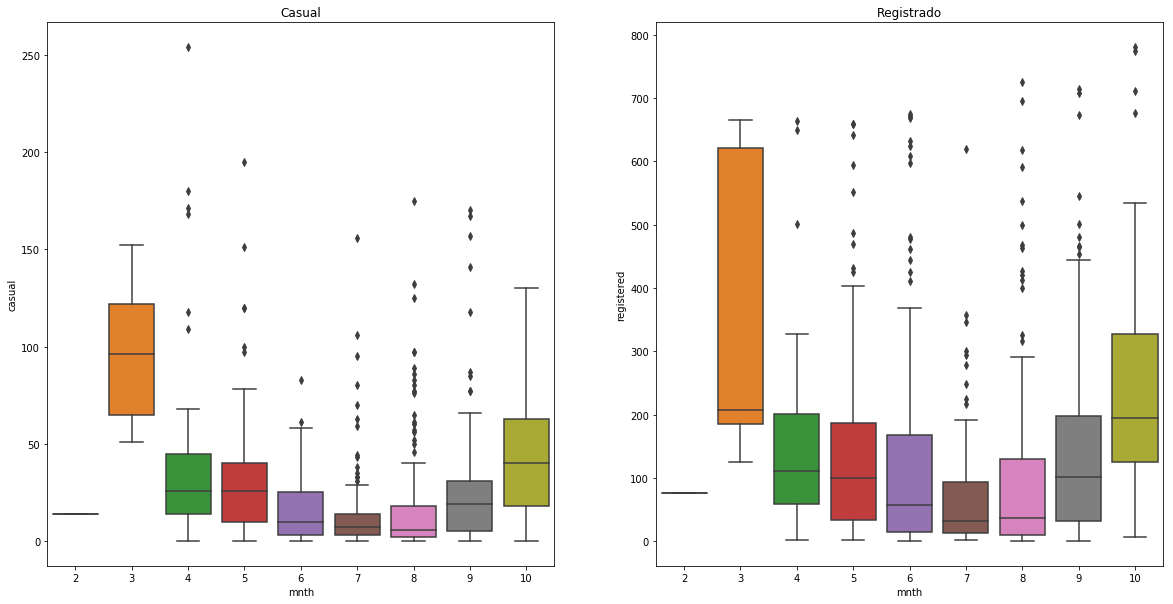

hr


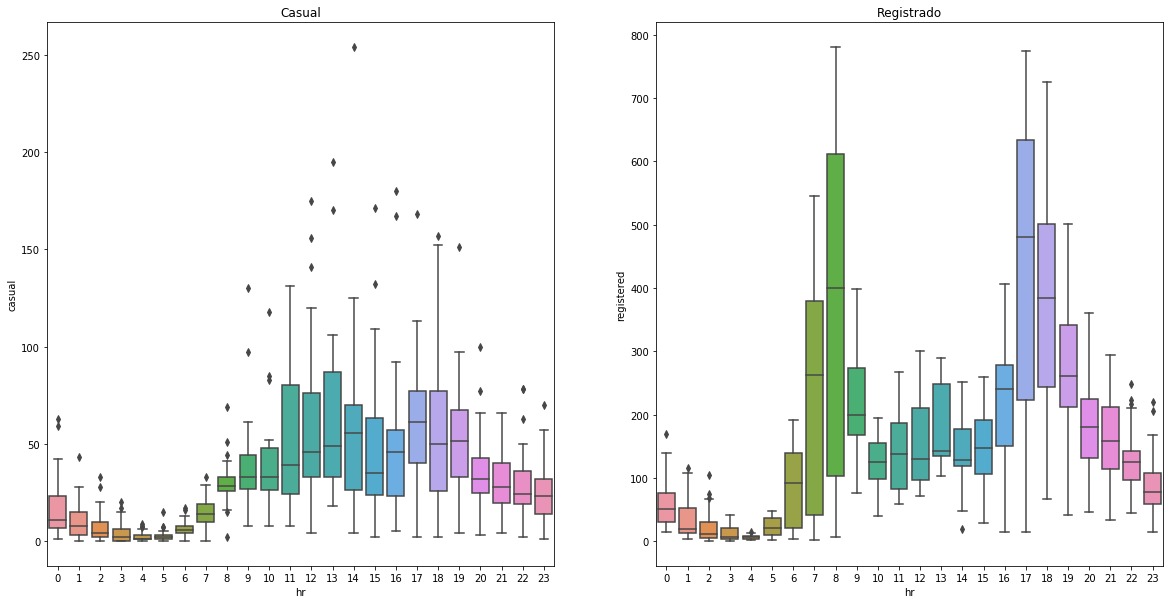

holiday


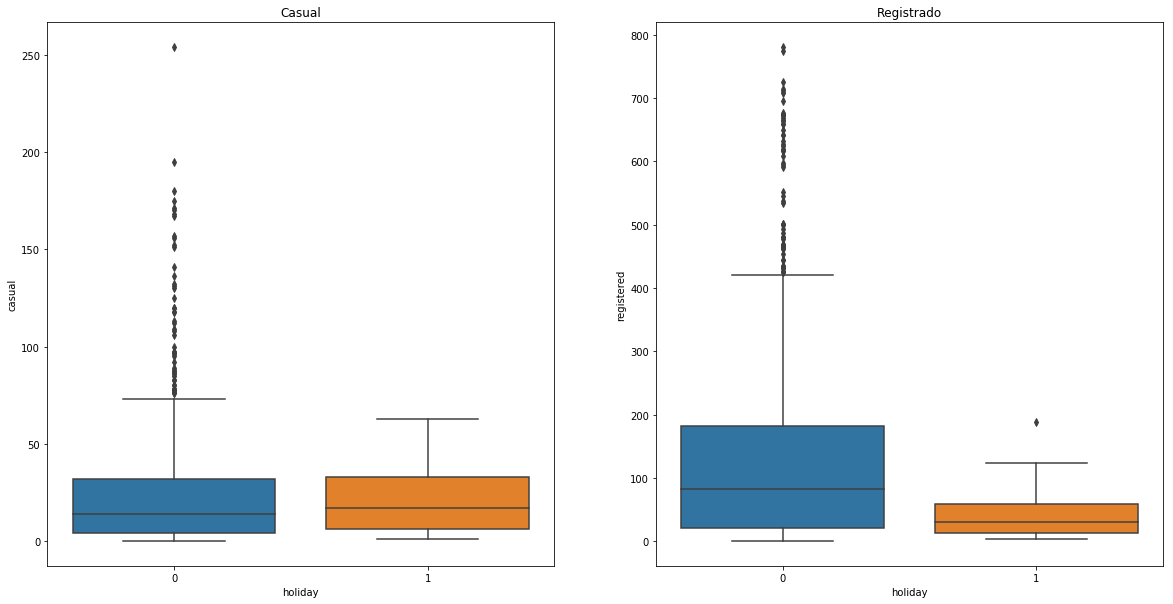

weekday


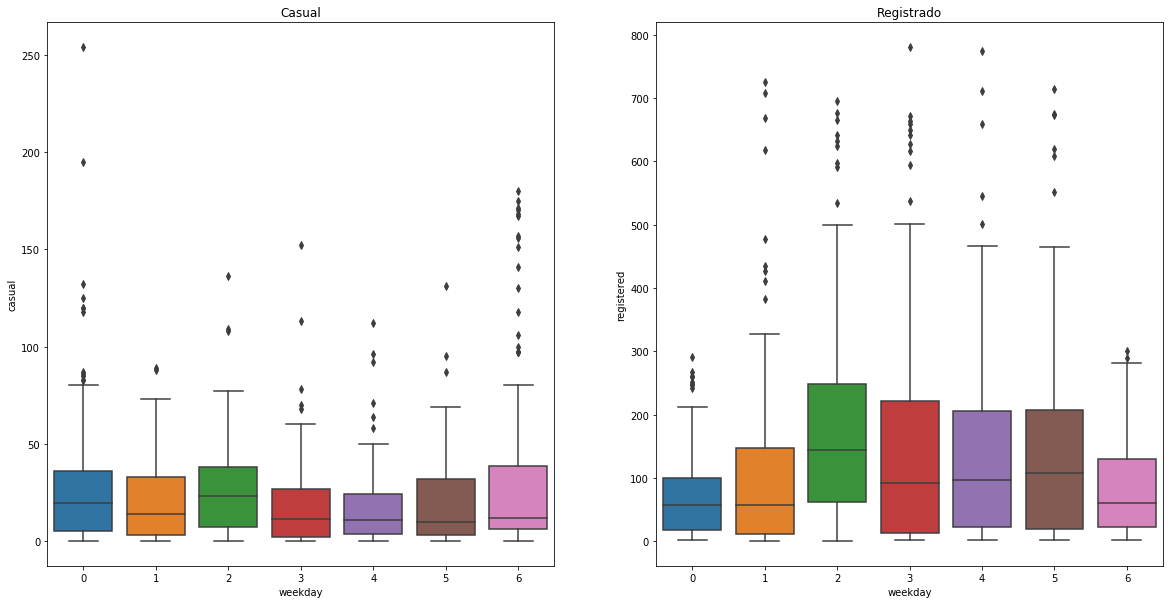

workingday


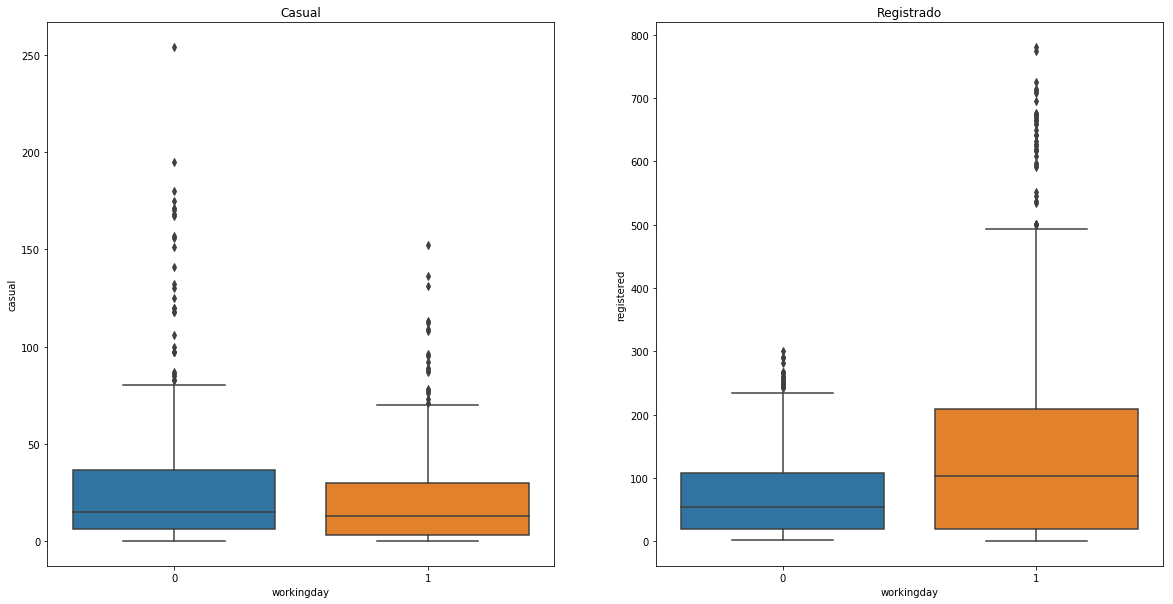

weathersit


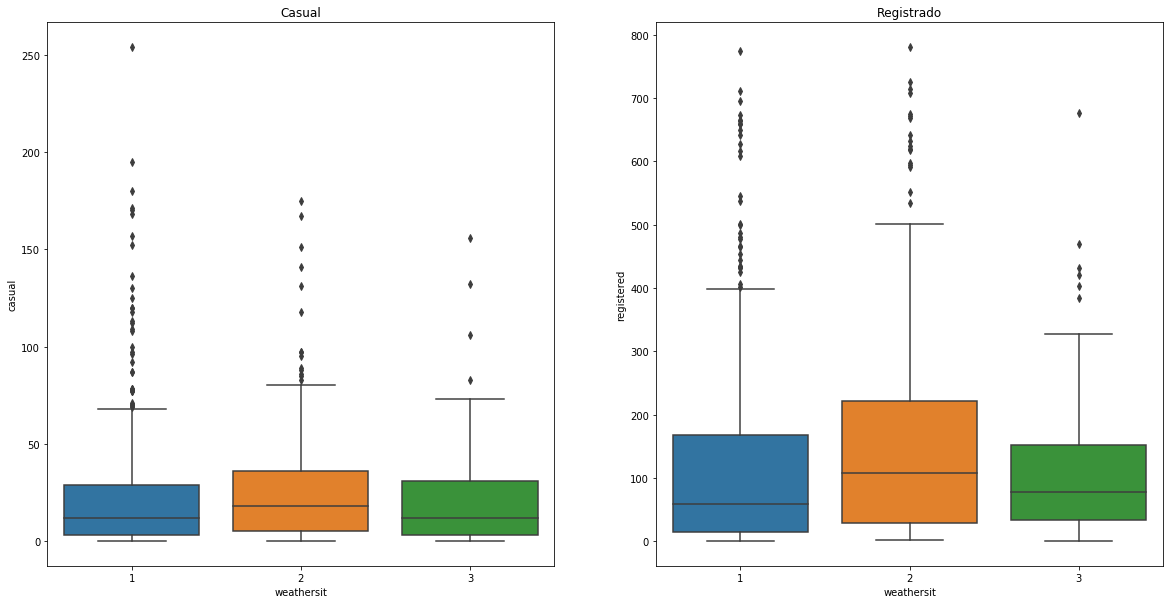

temp


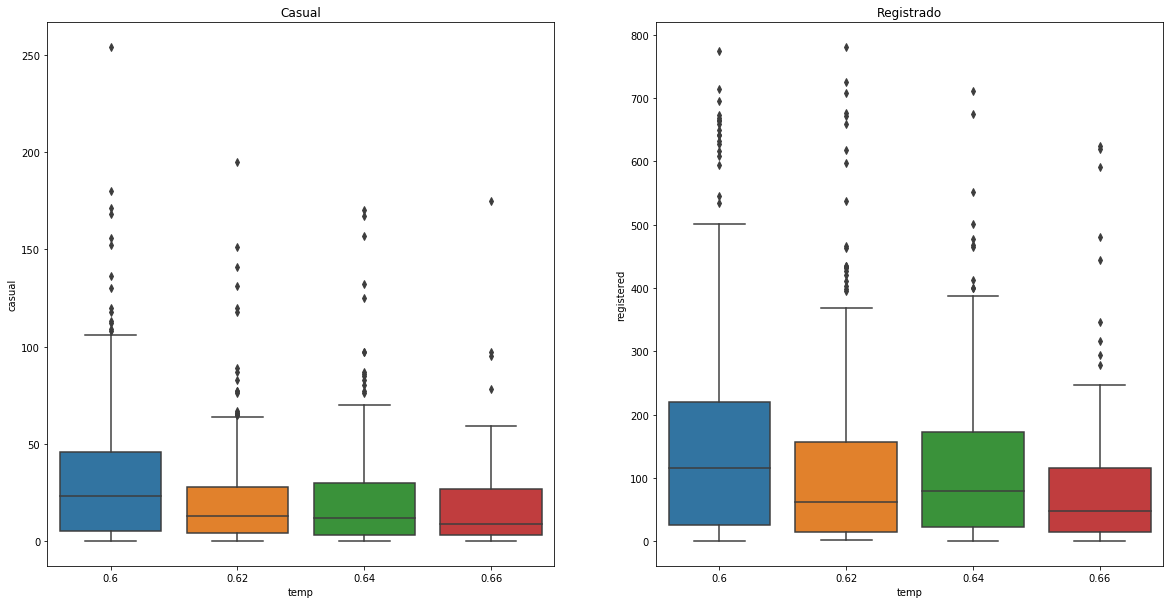

atemp


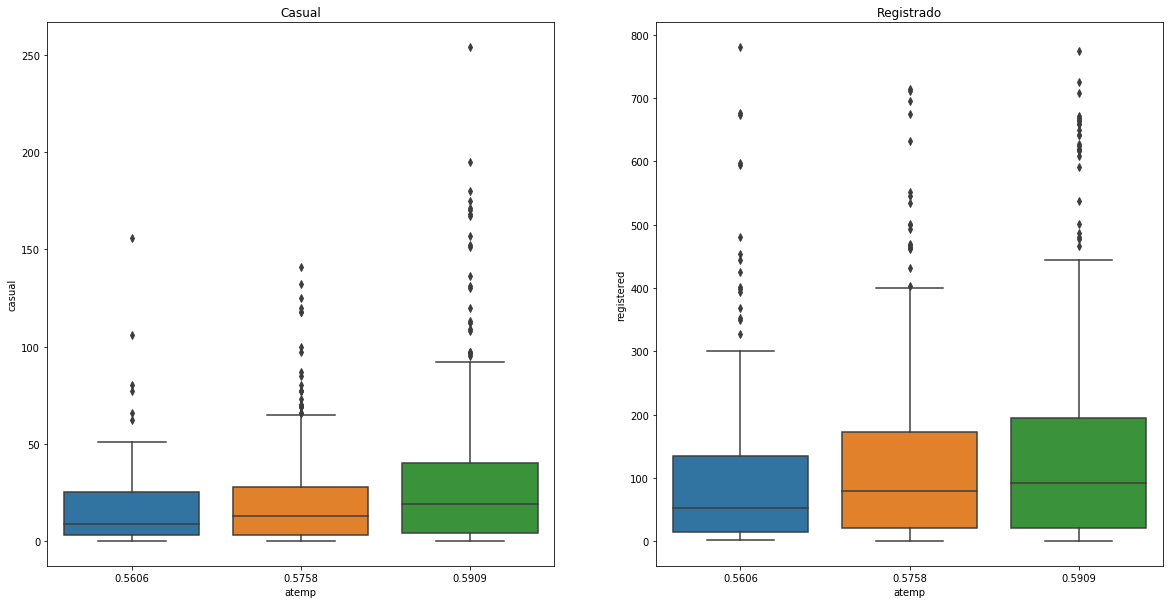

hum


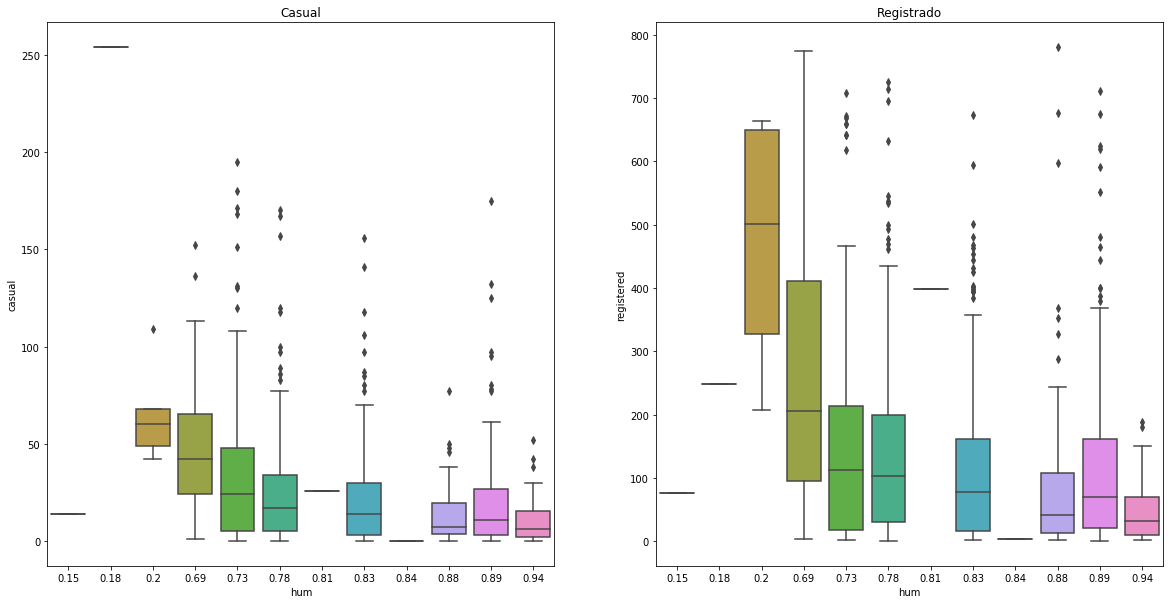

windspeed


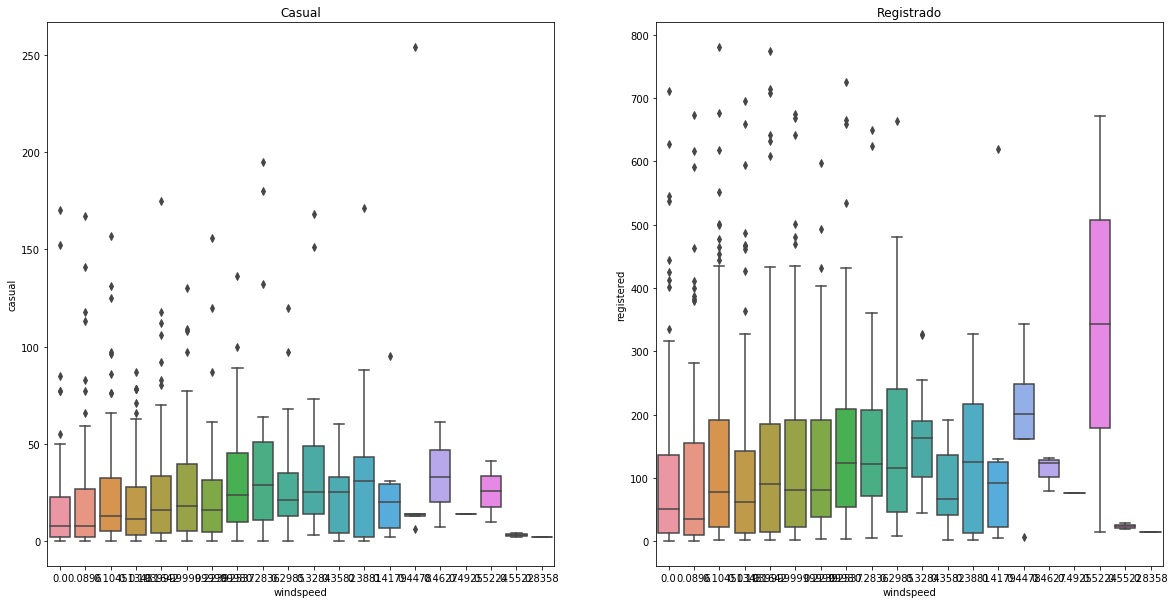

In [30]:
colunas = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
for col in colunas:
    print(col)
    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)
    plt.title('Casual')
    sns.boxplot(col, 'casual', data=depressao)
    
    plt.subplot(1, 2, 2)
    plt.title('Registrado')
    sns.boxplot(col, 'registered', data=depressao)
    
    plt.show()